In [96]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import pickle

In [97]:
#input WGBS file from cancer tissue
file = '/Users/khandekara2/Documents/methylationProject/01_data/MALY_prevBase_TP53cds.tsv'
df = pd.read_csv(file, sep='\t')
locations = []
for chrom, start, stop in zip(list(df['chromosome']), list(df['start']), list(df['stop'])):
    locations.append((str(chrom), int(start), int(stop)))
df['location'] = locations
grouped = df.groupby('location')
groupby = grouped.agg({'methylation_ratio': [np.mean, np.std], 'prev_base': 'max'})
groupby.reset_index(inplace=True)
groupby.columns = groupby.columns.droplevel(0)
# groupby.to_csv(file[:-4] + '.tsv', sep='\t')


In [98]:
y = groupby['mean'] #mean ratio from cancer
y_err = groupby['std'] #standard deviation from cancer samples
x = np.array([i for i in range(1, groupby.shape[0] + 1)]) # ticks for each CpG in coding region
labels = list(set([i[1] for i in df.location])) #coordinate of cytosine as labels
# x_labels = [i + 'CG' for i in groupby['max']]
# print (x_labels)
labels.sort()
tss = 7572926 #translation start site of TP53
x_labels = [i - 7572926 for i in labels]
# print (x_labels)

In [99]:
df


,chromosome,start,stop,id,methylation_ratio,prev_base,location
0,chr17,7572972,7572973,4118819_GCB,0.91,G,"(chr17, 7572972, 7572973)"
1,chr17,7572972,7572973,4122131_GCB,0.94,G,"(chr17, 7572972, 7572973)"
2,chr17,7572972,7572973,4160735_GCB,0.92,G,"(chr17, 7572972, 7572973)"
3,chr17,7572972,7572973,4174884_GCB,0.96,G,"(chr17, 7572972, 7572973)"
4,chr17,7572972,7572973,tumor_4105105,0.95,G,"(chr17, 7572972, 7572973)"
5,chr17,7572972,7572973,tumor_4112512,1.00,G,"(chr17, 7572972, 7572973)"
6,chr17,7572972,7572973,tumor_4119027,0.93,G,"(chr17, 7572972, 7572973)"
7,chr17,7572972,7572973,tumor_4121361,0.88,G,"(chr17, 7572972, 7572973)"
8,chr17,7572972,7572973,tumor_4125240,0.90,G,"(chr17, 7572972, 7572973)"
9,chr17,7572972,7572973,tumor_4133511,0.86,G,"(chr17, 7572972, 7572973)"


In [100]:
#confirm that the coordinates are in order
locs = list(groupby.iloc[:, 0])
starts = [i[1] for i in locs]
starts == sorted(starts)
print (starts)

[7572972, 7574001, 7574011, 7574016, 7574022, 7574028, 7577020, 7577045, 7577068, 7577089, 7577092, 7577119, 7577137, 7577537, 7577547, 7578182, 7578210, 7578243, 7578261, 7578373, 7578387, 7578405, 7578419, 7578454, 7578456, 7578460, 7578462, 7578469, 7578473, 7579311, 7579357, 7579364, 7579541, 7579545, 7579578, 7579881, 7579884, 7579900]


In [101]:
#input WGBS file from normal tissue
df2 = pd.read_csv('/Users/khandekara2/Documents/methylationProject/01_data/Thymus_TP53_cds.bed.tsv', sep='\t')
c = list(df2.start)
c = [i for i in c if i in labels]
c.sort() # now normal and cancer coordinates are matching
y2 = [] #methylation ratio from normal tissue 
for e in c:
    r = df2['methylation_ratio'].where(df2['start'] == e)
    # r is a series with all Nan's except for the value we want
    for a in r:
        if not np.isnan(a):
            y2.append(a)

In [102]:
#add mutated sites to profile
mutation_dict = pickle.load(open('/Users/khandekara2/Documents/methylationProject/01_data/mutation_dict_pickles/MALY_mutation_dict.pickle', 'rb'))
mutations = [] #coordinate of mutated site
mut_ratios = [] #methylation ratio of mutated site if available
frequencies = [] #frequency of mutation(# of samples it occurred in)
for loc, sample, ratio in zip(df.location, df.id, df.methylation_ratio):
    if loc in mutation_dict and loc[1] not in mutations:
        if sample in mutation_dict[loc]:
            mut_ratios.append(ratio)
        else:
            mut_ratios.append(1.1)
            
        mutations.append(loc[1])
        frequencies.append(len(mutation_dict[loc]))
        
    loc2 = (loc[0], loc[1] + 1, loc[2] + 1) #take care of the second cytosine in the dyad
    if loc2 in mutation_dict and loc[1] not in mutations:
        if sample in mutation_dict[loc2]:
            mut_ratios.append(ratio)
        else:
            mut_ratios.append(1.1)
    
        mutations.append(loc[1])
        frequencies.append(len(mutation_dict[loc2]))
               
# mut_ratios = [0.0 for _ in mutations]
print (np.array(list(mutations)))
print (mut_ratios)

[7577119 7577537 7577547]
[1.1, 1.1, 1.1]


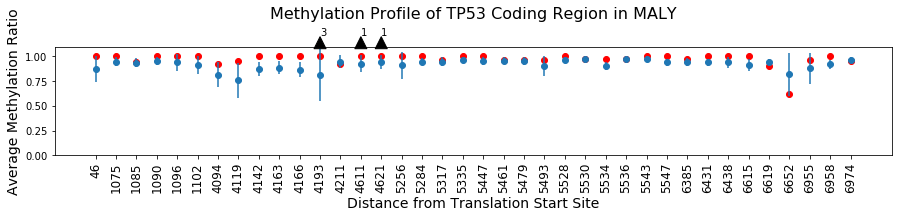

In [103]:
%matplotlib inline
fig = plt.figure(figsize=(15, 2))
ax = fig.add_subplot(111)
ax.set_xticks(x)
ax.set_xticklabels(x_labels, rotation='vertical', fontsize=12)
ax.set_ylim((0.0, 1.1))
ax.errorbar(x, y, yerr=y_err, fmt='o')
ax.set_xlabel('Distance from Translation Start Site', fontsize=14)
ax.set_ylabel('Average Methylation Ratio', fontsize=14)
ax.scatter(x, y2, color='red')
# ax.scatter(np.array(list(mutations)), np.array(mut_ratios), color='green')
trans = ax.get_xaxis_transform()
for u, v, f in zip(mutations, mut_ratios, frequencies):
    ax.annotate(str(f), xy=(labels.index(u) + 1, v), xycoords=trans, arrowprops=dict(facecolor='black', shrink=0.5,))
ttl = ax.title
ttl.set_position([.5, 1.2])
ax.set_title('Methylation Profile of TP53 Coding Region in MALY', fontsize=16)
# plt.gcf().subplots_adjust(bottom=0.15)
fig.savefig('/Users/khandekara2/Documents/methylationProject/03_results/MALY_TP53_methylation_profile.png', bbox_inches='tight')

In [104]:
print (mut_ratios)

[1.1, 1.1, 1.1]


In [105]:
print (mutations)

[7577119, 7577537, 7577547]


In [106]:
print (frequencies)

[3, 1, 1]


In [107]:
print (mutation_dict[('chr17', 7577119, 7577119 + 1)])

['tumor_4102009', 'tumor_4194218', 'tumor_4189998']


In [108]:
print (x_labels)


[46, 1075, 1085, 1090, 1096, 1102, 4094, 4119, 4142, 4163, 4166, 4193, 4211, 4611, 4621, 5256, 5284, 5317, 5335, 5447, 5461, 5479, 5493, 5528, 5530, 5534, 5536, 5543, 5547, 6385, 6431, 6438, 6615, 6619, 6652, 6955, 6958, 6974]


In [109]:
print(x_labels.index(u))

ValueError: 7577547 is not in list

In [ ]:
print (u)

In [ ]:
print (x)

In [ ]:
print (y2)